In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


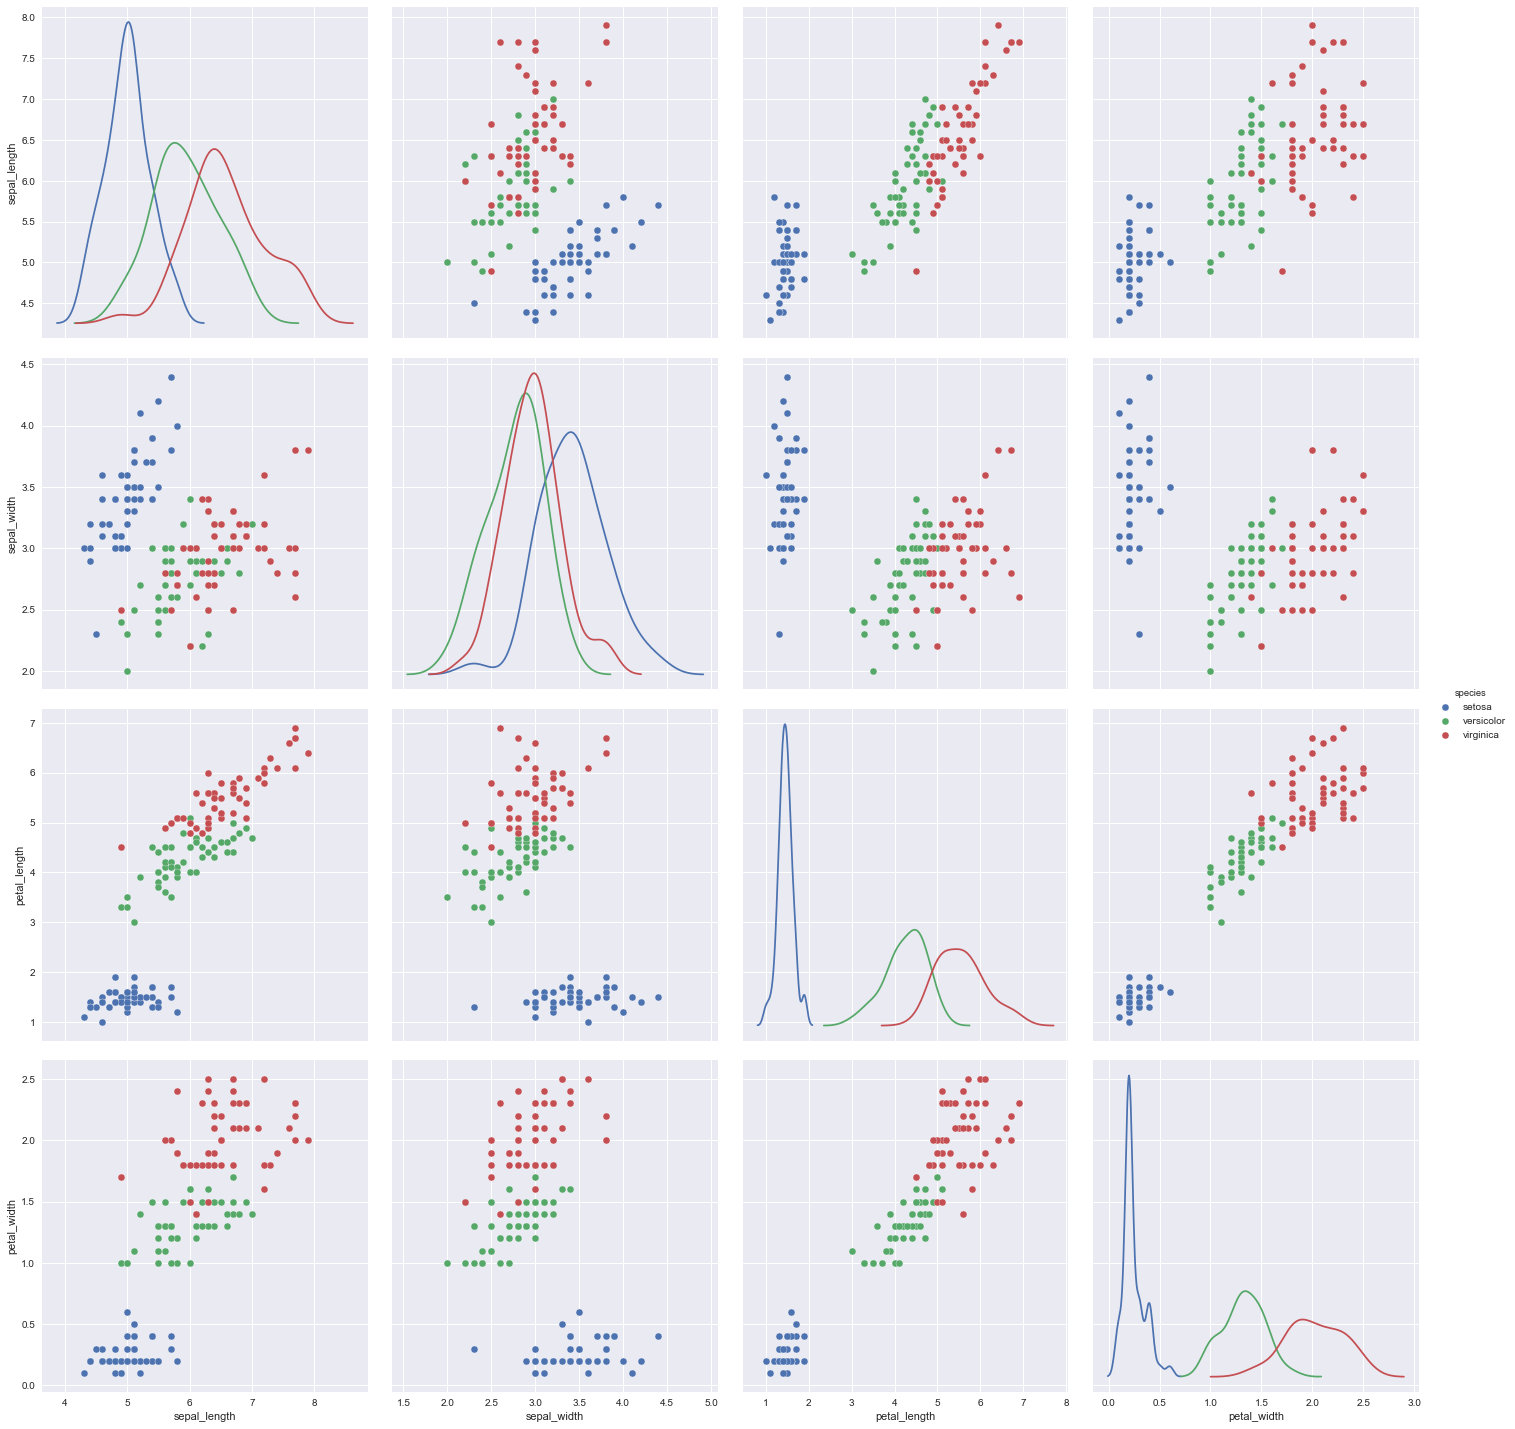

In [6]:
sns.pairplot(iris, hue= "species", size=5, diag_kind="kde")

C:\Users\Mehmet\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


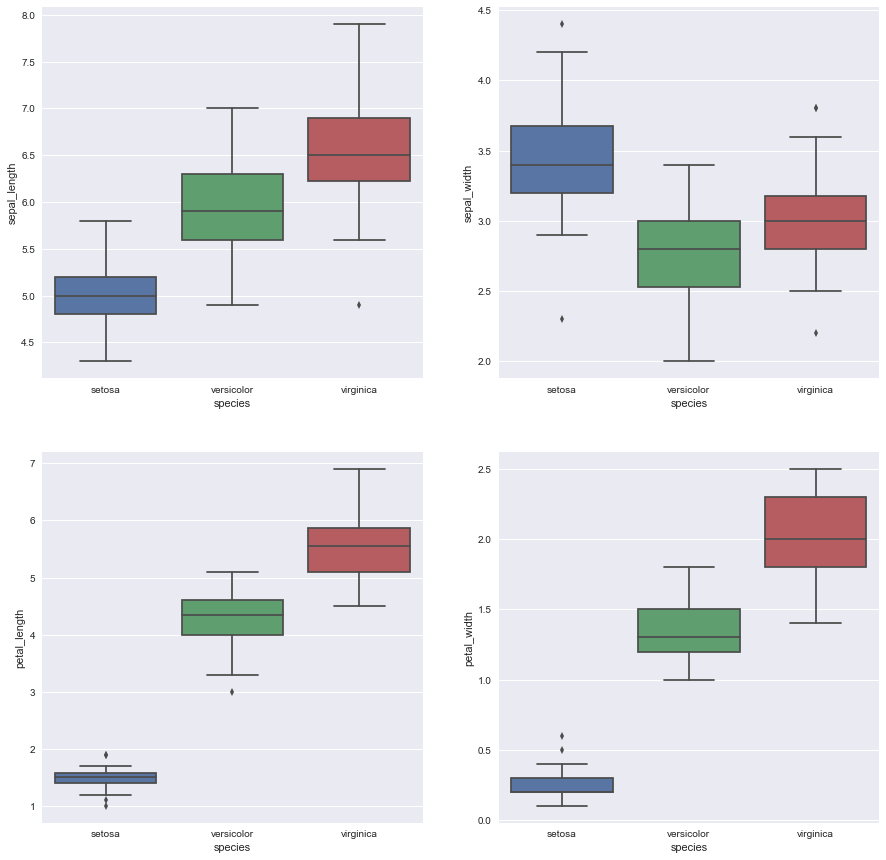

In [7]:
fig, axes = plt.subplots(figsize = (15, 15), ncols= 2, nrows= 2)
sns.boxplot(x="species", y="sepal_length", data=iris, orient="v", ax = axes[0,0])
sns.boxplot(x="species", y="sepal_width", data=iris, orient="v", ax = axes[0,1])
sns.boxplot(x="species", y="petal_length", data=iris, orient="v", ax = axes[1,0])
sns.boxplot(x="species", y="petal_width", data=iris, orient="v", ax = axes[1,1])

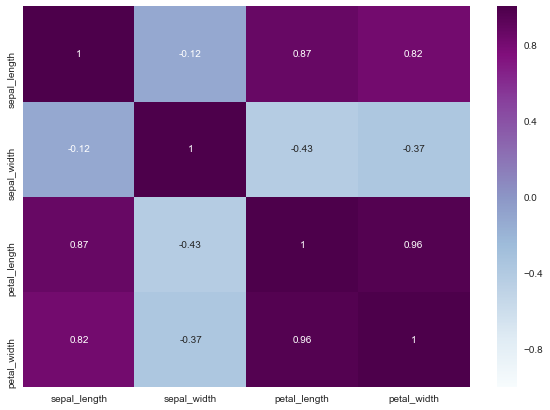

In [8]:
plt.subplots(figsize= (10,7))
sns.heatmap(iris.corr(), cmap="BuPu", annot=True)

In [9]:
## Before fitting models, we should use numeric values for flower categories.
dict = {"setosa":0, "versicolor":1, "virginica":2}
iris["species"] = iris["species"].map(dict)

In [10]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
X = iris.drop("species", axis= 1)
y = iris["species"]

In [12]:
## Splitting data set into train and test sets
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [14]:
print(str(X_train.shape[0]) + " samples will be used to train the model and " + str(X_test.shape[0]) + " samples will be used to test the model")

90 samples will be used to train the model and 60 samples will be used to test the model


In [15]:
## Scaling X values.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [16]:
## We will fit different models and compare scores. (Support Vector Classification, K-Nearest Neighbors, Logistic Regression, 
## Random Forest Classifier and Decision Tree Classifier)
## Then, we will visualize decison boundaries by using petal_length vs petal_width sepal_lentgh vs sepal_width 
## Support Vector Classification

from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
print("The score of SVC on the training set is {:.1f} %.".format(svm.score(X_train_std, y_train)*100))
print("The score of SVC on the test set is {:.1f} %.".format(svm.score(X_test_std, y_test)*100))

The score of SVC on the training set is 96.7 %.
The score of SVC on the test set is 96.7 %.


In [18]:
## K-Nearest Neighnors

from sklearn.neighbors import KNeighborsClassifier

## n_neighbors=5
knn_5 = KNeighborsClassifier(n_neighbors=5, p=2)
knn_5.fit(X_train_std, y_train)

## n_neighbors=7 
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [19]:
print("The score of KNN with k=5 on the training set is {:.1f} %.".format(knn_5.score(X_train_std, y_train)*100))
print("The score of KNN with k=5 on the test set is {:.1f} %.".format(knn_5.score(X_test_std, y_test)*100))

print("The score of KNN with k=7 on the training set is {:.1f} %.".format(knn_7.score(X_train_std, y_train)*100))
print("The score of KNN with k=7 on the test set is {:.1f} %.".format(knn_7.score(X_test_std, y_test)*100))

The score of KNN with k=5 on the training set is 96.7 %.
The score of KNN with k=5 on the test set is 98.3 %.
The score of KNN with k=7 on the training set is 97.8 %.
The score of KNN with k=7 on the test set is 100.0 %.


In [20]:
##Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_std,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
print("The score of Logistic Regression on the training set is {:.1f} %.".format(logreg.score(X_train_std, y_train)*100))
print("The score of Logistic Regression on the test set is {:.1f} %.".format(logreg.score(X_test_std, y_test)*100))

The score of Logistic Regression on the training set is 90.0 %.
The score of Logistic Regression on the test set is 86.7 %.


In [22]:
## Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

## with max_depth=3

rfc_3 = RandomForestClassifier(max_depth=3)
rfc_3.fit(X_train_std,y_train)

## with max_depth=5

rfc_5 = RandomForestClassifier(max_depth=5)
rfc_5.fit(X_train_std,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [23]:
print("The score of Random Forest Classifier with max_depth=3 on the training set is {:.1f} %.".format(rfc_3.score(X_train_std, y_train)*100))
print("The score of Random Forest Classifier with max_depth=3 on the test set is {:.1f} %.".format(rfc_3.score(X_test_std, y_test)*100))

print("The score of Random Forest Classifier with max_depth=5 on the train set is {:.1f} %.".format(rfc_5.score(X_train_std, y_train)*100))
print("The score of Random Forest Classifier with max_depth=5 on the test set is {:.1f} %.".format(rfc_5.score(X_test_std, y_test)*100))

The score of Random Forest Classifier with max_depth=3 on the training set is 96.7 %.
The score of Random Forest Classifier with max_depth=3 on the test set is 95.0 %.
The score of Random Forest Classifier with max_depth=5 on the train set is 98.9 %.
The score of Random Forest Classifier with max_depth=5 on the test set is 96.7 %.


In [24]:
## Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

## with max_depth=3

dt_3 = DecisionTreeClassifier(max_depth=3)
dt_3.fit(X_train_std,y_train)

## with max_depth=5

dt_5 = DecisionTreeClassifier(max_depth=5)
dt_5.fit(X_train_std,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [25]:
print("The score of Decision Tree Classifier with max_depth=3 on the training set is {:.1f} %.".format(dt_3.score(X_train_std, y_train)*100))
print("The score of Decision Tree Classifier with max_depth=3 on the test set is {:.1f} %.".format(dt_3.score(X_test_std, y_test)*100))


print("The score of Decision Tree Classifier with max_depth=5 on the training set is {:.1f} %.".format(dt_5.score(X_train_std, y_train)*100))
print("The score of Decision Tree Classifier with max_depth=5 on the test set is {:.1f} %.".format(dt_5.score(X_test_std, y_test)*100))

The score of Decision Tree Classifier with max_depth=3 on the training set is 97.8 %.
The score of Decision Tree Classifier with max_depth=3 on the test set is 98.3 %.
The score of Decision Tree Classifier with max_depth=5 on the training set is 100.0 %.
The score of Decision Tree Classifier with max_depth=5 on the test set is 96.7 %.


In [26]:
## First two columns are for petal_length and petal_width, last two columns are for sepal_length and sepal_width
## To be able to plot decision boundaries, we should plot for petal and sepal separately 

X_train_std_petal = X_train_std[:,0:2]
X_test_std_petal = X_test_std[:,0:2]

X_train_std_sepal = X_train_std[:, 2:4]
X_test_std_sepal = X_test_std[:, 2:4]


In [27]:
## n_neighbors=6 
knn_petal_6 = KNeighborsClassifier(n_neighbors=6)
knn_petal_6.fit(X_train_std_petal, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [28]:
print("The score of KNN with k=6 on the petal training set is {:.1f} %.".format(knn_petal_6.score(X_train_std_petal, y_train)*100))
print("The score of KNN with k=6 on the petal test set is {:.1f} %.".format(knn_petal_6.score(X_test_std_petal, y_test)*100))

The score of KNN with k=6 on the petal training set is 85.6 %.
The score of KNN with k=6 on the petal test set is 81.7 %.


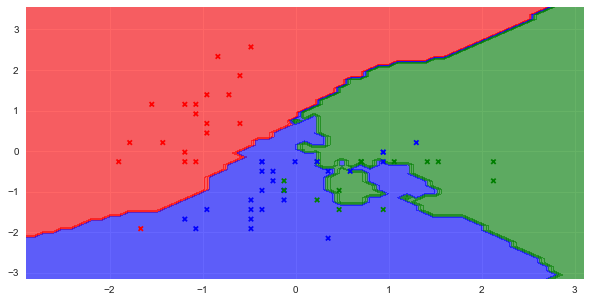

In [29]:
# Plotting decision boundaries for knn_6
x_min, x_max = X_test_std_petal[:, 0].min() - 1, X_test_std_petal[:, 0].max() + 1
y_min, y_max = X_test_std_petal[:, 1].min() - 1, X_test_std_petal[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

plt.subplots(figsize=(10, 5))

Z = knn_petal_6.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap = ListedColormap(["red", "blue", "green"])

plt.contourf(xx, yy, Z, alpha=0.6, cmap= cmap)
plt.scatter(X_test_std_petal[:, 0], X_test_std_petal[:, 1], c=y_test, s=20, edgecolor='k', cmap= cmap, marker = "x")

plt.show()

In [30]:
## However, if you want to plot decision boundaries, you can deploy "mlxtend" (Machine Learning Extensions)
## library to do it with one line. For more details: https://github.com/rasbt/mlxtend

from mlxtend.plotting import plot_decision_regions

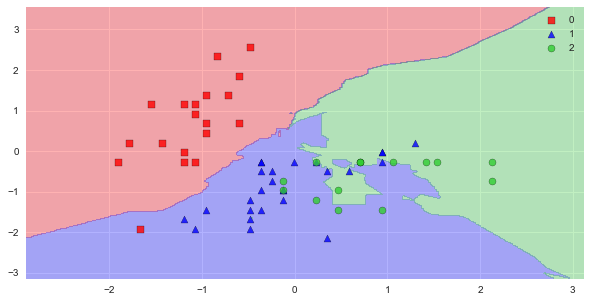

In [31]:
plt.subplots(figsize= (10,5))
plot_decision_regions(X_test_std_petal,np.array(y_test),knn_petal_6)

In [32]:
## We can easily plot decision boundaries for sepal after fitting model for sepal.

knn_sepal_6= KNeighborsClassifier(n_neighbors=6)
knn_sepal_6.fit(X_train_std_sepal, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [33]:
print("The score of KNN with k=1 on the sepal training set is {:.1f} %.".format(knn_sepal_6.score(X_train_std_sepal, y_train)*100))
print("The score of KNN with k=1 on the sepal training set is {:.1f} %.".format(knn_sepal_6.score(X_test_std_sepal, y_test)*100))

The score of KNN with k=1 on the sepal training set is 95.6 %.
The score of KNN with k=1 on the sepal training set is 98.3 %.


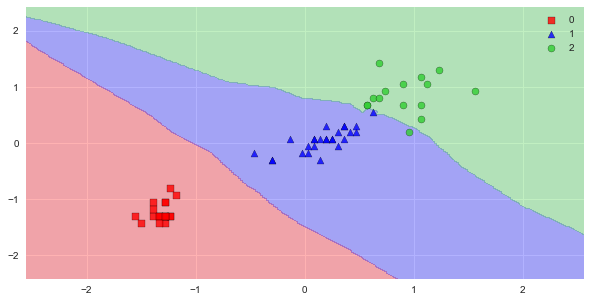

In [34]:
plt.subplots(figsize= (10,5))
plot_decision_regions(X_test_std_sepal,np.array(y_test),knn_sepal_6)